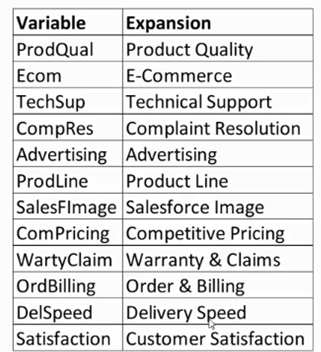

### Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#### 1.	Read the ‘.csv’ file, check the data types of the different variables.Check for null values and remove them, if found. Drop any variables which are not required for the analysis. Then check the basic descriptive statistics of the continuous variables. 

### Reading the file

In [2]:
df = pd.read_csv('Marketing_Satisfaction.csv')
df.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [3]:
df.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

### Checking for the data types of different variables with the .'info()' and the '.dtypes' command.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB
None


In [5]:
print(df.dtypes)

ID                int64
ProdQual        float64
Ecom            float64
TechSup         float64
CompRes         float64
Advertising     float64
ProdLine        float64
SalesFImage     float64
ComPricing      float64
WartyClaim      float64
OrdBilling      float64
DelSpeed        float64
Satisfaction    float64
dtype: object


### Checking for the null values.

In [6]:
df.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

### Removing the 'ID' colummn.

In [7]:
df.duplicated(subset = 'ID').sum()

0

In [8]:
df.drop(labels=['ID', 'Satisfaction'],axis=1,inplace=True)
df.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5


### Measures of descriptive statistics.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1
OrdBilling,100.0,4.278,0.928840,2.0,3.700,4.40,4.800,6.7


#### 2. Check the scatterplot between all the variables.

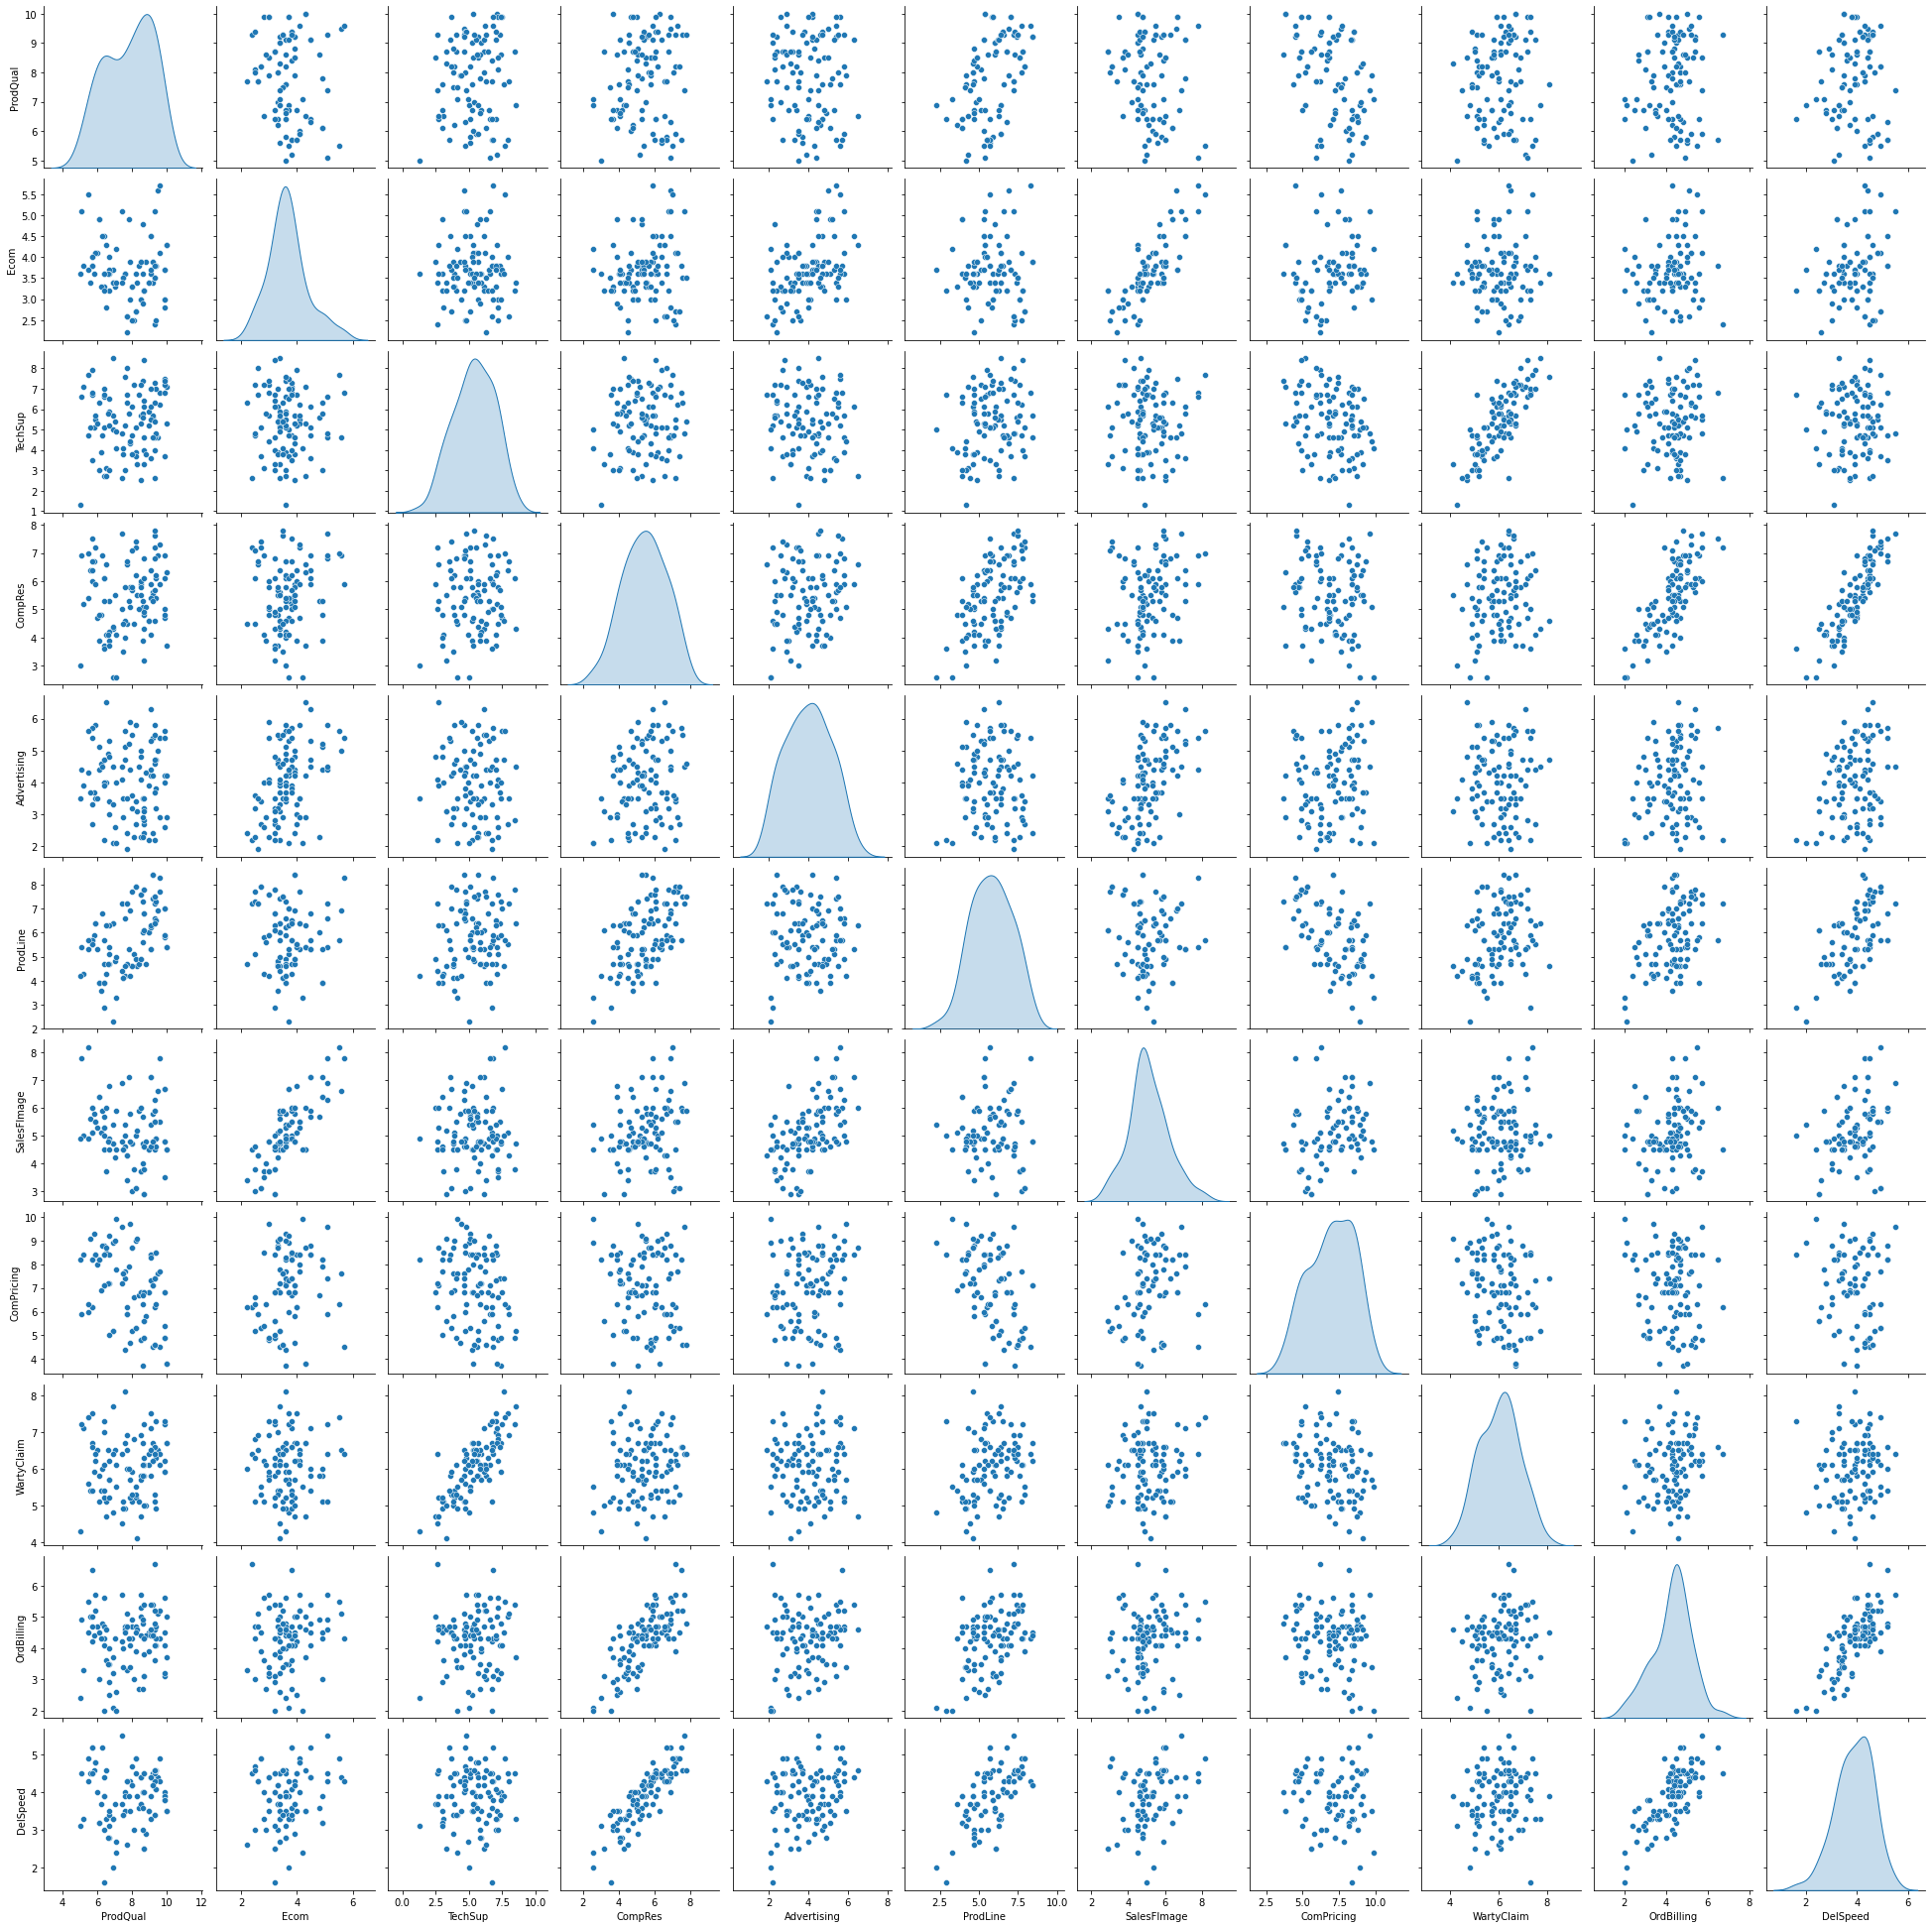

In [10]:
sns.pairplot(df,diag_kind='kde');

# 3. Build the correlation matrix. Also, visualize the correlation matrix in the form of a heatmap.

In [11]:
corr = df.corr()
corr

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003


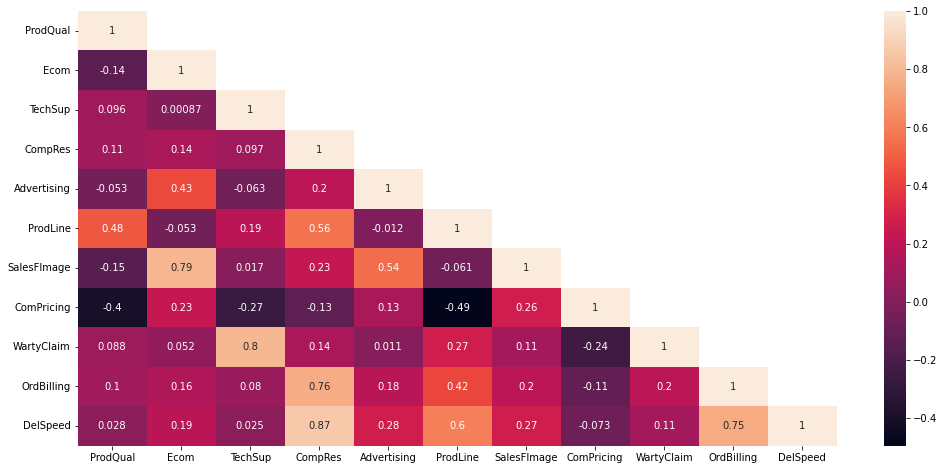

In [12]:
plt.figure(figsize=(17,8))
sns.heatmap(corr,annot=True,mask=np.triu(corr,+1));

# 4. Perform Principal Component Analysis on the data and reduce the predictor variables to a suitable number of dimensions. 
#### i) Scale the data using z-score using scipy.stats library
#### ii) Build a covariance matrix
#### iii) Print eigen values and eigen vectors 
#### iv) Find the variance explained by each of eigen values
#### v) Find the Cumulative Variance explained 
#### vi)Plot Variance vs Number of Eigen Values or Principal Components
#### vii) Plot Eigen values vs Number of Eigen Values or Principal Components
#### [students can perform PCA by any one of the following methods]

##### Method 1: PCA using statsmodels library
##### Or
##### Method 2: PCA using Scikit-learn library

### Method 1

In [13]:
# Step 1

# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

from scipy.stats import zscore
data_scaled=df.apply(zscore)
data_scaled.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220


In [14]:
cov_matrix = np.cov(data_scaled.T)
cov_matrix

array([[ 1.01010101e+00, -1.38548704e-01,  9.65661154e-02,
         1.07444445e-01, -5.40132667e-02,  4.82316579e-01,
        -1.53346338e-01, -4.05335236e-01,  8.92043497e-02,
         1.05356640e-01,  2.79979825e-02],
       [-1.38548704e-01,  1.01010101e+00,  8.75544162e-04,
         1.41595213e-01,  4.34233041e-01, -5.32200387e-02,
         7.99539102e-01,  2.31780203e-01,  5.24224157e-02,
         1.57724577e-01,  1.93571786e-01],
       [ 9.65661154e-02,  8.75544162e-04,  1.01010101e+00,
         9.76329270e-02, -6.35051180e-02,  1.94571168e-01,
         1.71621612e-02, -2.73521901e-01,  8.05220127e-01,
         8.09109340e-02,  2.56976702e-02],
       [ 1.07444445e-01,  1.41595213e-01,  9.76329270e-02,
         1.01010101e+00,  1.98905906e-01,  5.67087831e-01,
         2.32072486e-01, -1.29246720e-01,  1.41826562e-01,
         7.64513729e-01,  8.73829997e-01],
       [-5.40132667e-02,  4.34233041e-01, -6.35051180e-02,
         1.98905906e-01,  1.01010101e+00, -1.16674936e-02,
  

In [15]:
# output is similar to correlation matrix
data_scaled.cov()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.010101,-0.138549,0.096566,0.107444,-0.054013,0.482317,-0.153346,-0.405335,0.089204,0.105357,0.027998
Ecom,-0.138549,1.010101,0.000876,0.141595,0.434233,-0.053220,0.799539,0.231780,0.052422,0.157725,0.193572
TechSup,0.096566,0.000876,1.010101,0.097633,-0.063505,0.194571,0.017162,-0.273522,0.805220,0.080911,0.025698
CompRes,0.107444,0.141595,0.097633,1.010101,0.198906,0.567088,0.232072,-0.129247,0.141827,0.764514,0.873830
Advertising,-0.054013,0.434233,-0.063505,0.198906,1.010101,-0.011667,0.547680,0.135573,0.010901,0.186097,0.278650
ProdLine,0.482317,-0.053220,0.194571,0.567088,-0.011667,1.010101,-0.061935,-0.499948,0.275836,0.428695,0.607930
SalesFImage,-0.153346,0.799539,0.017162,0.232072,0.547680,-0.061935,1.010101,0.267269,0.108541,0.197098,0.274294
ComPricing,-0.405335,0.231780,-0.273522,-0.129247,0.135573,-0.499948,0.267269,1.010101,-0.247461,-0.115724,-0.073608
WartyClaim,0.089204,0.052422,0.805220,0.141827,0.010901,0.275836,0.108541,-0.247461,1.010101,0.199056,0.110500
OrdBilling,0.105357,0.157725,0.080911,0.764514,0.186097,0.428695,0.197098,-0.115724,0.199056,1.010101,0.758589


In [16]:
# Step 3
#Extract eigen vectors and eigen values using linear algebra library

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [17]:
print('Eigen Vectors \n')
eig_vecs

Eigen Vectors 



array([[ 0.13378962, -0.31349802,  0.06227164,  0.6431362 , -0.2316662 ,
        -0.56456996,  0.19164132,  0.18279209,  0.06659717, -0.13547311,
         0.0313281 ],
       [ 0.16595278,  0.44650918, -0.23524791,  0.27238033, -0.42228844,
         0.26325703,  0.05962621,  0.06233863,  0.28155772,  0.12202642,
        -0.54251104],
       [ 0.15769263, -0.23096734, -0.61095105, -0.19339314,  0.02395667,
        -0.10876896, -0.01719992, -0.05192956, -0.3881709 , -0.46470964,
        -0.35929961],
       [ 0.47068359,  0.01944394,  0.21035078, -0.20632037, -0.02865743,
        -0.02815231, -0.0084996 , -0.36253352,  0.53467243, -0.51339754,
         0.09324751],
       [ 0.18373495,  0.36366471, -0.08809705,  0.31789448,  0.80387024,
        -0.20056937, -0.06306962, -0.08118684,  0.03715799,  0.05347713,
        -0.15468169],
       [ 0.38676517, -0.28478056,  0.11627864,  0.20290226, -0.11667416,
         0.09819533, -0.60814755, -0.38507778, -0.23479794,  0.3332071 ,
        -0.084

In [18]:
eig_vecs_df = pd.DataFrame(eig_vecs, index = df.columns)
eig_vecs_df

,0,1,2,3,4,5,6,7,8,9,10
ProdQual,0.133790,-0.313498,0.062272,0.643136,-0.231666,-0.564570,0.191641,0.182792,0.066597,-0.135473,0.031328
Ecom,0.165953,0.446509,-0.235248,0.272380,-0.422288,0.263257,0.059626,0.062339,0.281558,0.122026,-0.542511
TechSup,0.157693,-0.230967,-0.610951,-0.193393,0.023957,-0.108769,-0.017200,-0.051930,-0.388171,-0.464710,-0.359300
CompRes,0.470684,0.019444,0.210351,-0.206320,-0.028657,-0.028152,-0.008500,-0.362534,0.534672,-0.513398,0.093248
Advertising,0.183735,0.363665,-0.088097,0.317894,0.803870,-0.200569,-0.063070,-0.081187,0.037158,0.053477,-0.154682
ProdLine,0.386765,-0.284781,0.116279,0.202902,-0.116674,0.098195,-0.608148,-0.385078,-0.234798,0.333207,-0.084155
SalesFImage,0.203670,0.470696,-0.241342,0.222177,-0.204373,0.104972,0.001437,-0.084699,-0.353412,-0.169107,0.644899
ComPricing,-0.151689,0.413457,0.053045,-0.333543,-0.248926,-0.709736,-0.308249,-0.102958,-0.045182,0.098832,-0.094144
WartyClaim,0.212934,-0.191672,-0.598564,-0.185302,0.032927,-0.139840,-0.030640,0.128932,0.435348,0.443540,0.317566
OrdBilling,0.437218,0.026399,0.168930,-0.236854,-0.026754,-0.119480,0.659320,-0.194151,-0.303865,0.366018,-0.099073


In [19]:
eig_vals

array([3.4615872 , 2.57666335, 1.70805705, 1.09753137, 0.61557989,
       0.55745836, 0.40557389, 0.09942123, 0.13418341, 0.249446  ,
       0.20560936])

In [20]:
# Step 4

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('The variance explained by each of eigen values in order is ',var_exp)

The variance explained by each of eigen values in order is  [31.154284801237026, 23.189970109084886, 15.372513414611305, 9.877782332815903, 5.54021904464993, 5.0171252531071975, 3.6501649702912324, 2.2450140428993857, 1.850484252527727, 1.2076506994143132, 0.894791079361094]


In [21]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 31.1542848   54.34425491  69.71676832  79.59455066  85.1347697
  90.15189496  93.80205993  96.04707397  97.89755822  99.10520892
 100.        ]


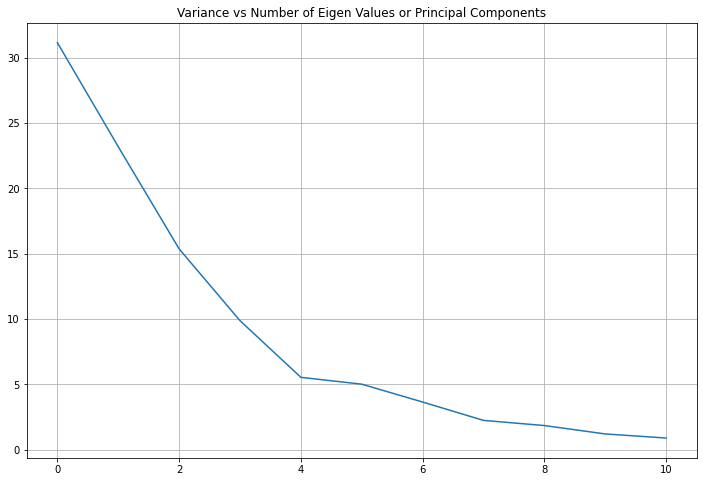

In [22]:
# Step 5

plt.figure(figsize=(12,8))
plt.plot(var_exp)
plt.title('Variance vs Number of Eigen Values or Principal Components')
plt.grid()

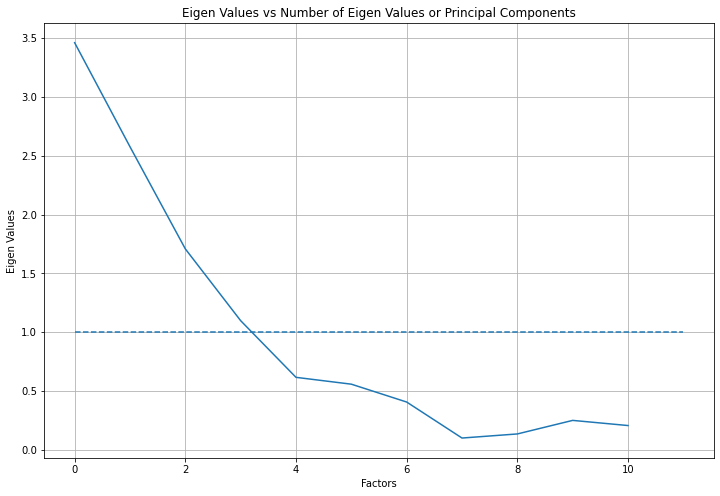

In [23]:
plt.figure(figsize=(12,8))
plt.plot(eig_vals)
plt.grid()
plt.ylabel('Eigen Values')
plt.xlabel('Factors')
plt.hlines(y=1,xmin=0,xmax=11,linestyles='dashed')
plt.title('Eigen Values vs Number of Eigen Values or Principal Components');

In [24]:
print('From the above plot, we can see that the number of components that we can probably take is 4.\n'
      'We also see that if we take 4 components the total amount of variance explained is',cum_var_exp[3],'%')

From the above plot, we can see that the number of components that we can probably take is 4.
We also see that if we take 4 components the total amount of variance explained is 79.59455065774911 %


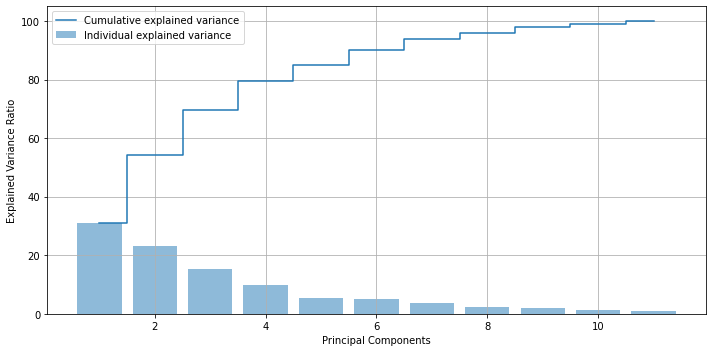

In [25]:
# Let us now plot one more graph with both the variance explained by each eigen value 
#and the cumulative variance explained.

plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.grid()
plt.show()

## Use PCA  from sklearn's decomposition Library

#### Method:2 

In [26]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(data_scaled)

array([[ 0.0795508 ,  1.54319843,  1.89504643, ...,  0.44484537,
         0.03867319, -0.33948838],
       [-1.10096634, -2.42029823,  2.04552113, ..., -0.40787741,
         0.46637257,  0.21361315],
       [-2.19706653, -0.72744044,  0.16680026, ...,  0.38871416,
        -0.81054552,  0.08570392],
       ...,
       [ 3.19577568, -1.86292048,  1.29747695, ..., -0.69044976,
         0.13343324, -0.31962405],
       [-0.62088819,  2.34984871, -1.12785588, ..., -0.08262926,
        -0.26297433, -0.01658993],
       [ 1.63523181,  1.25986453,  0.40255069, ...,  0.17869371,
         0.37326589, -0.01321407]])

In [27]:
print('Eigen Vectors \n')
pd.DataFrame(pca.components_, columns = df.columns).T

Eigen Vectors 



,0,1,2,3,4,5,6,7,8,9,10
ProdQual,-0.133790,-0.313498,0.062272,0.643136,0.231666,-0.564570,0.191641,0.135473,0.031328,0.066597,0.182792
Ecom,-0.165953,0.446509,-0.235248,0.272380,0.422288,0.263257,0.059626,-0.122026,-0.542511,0.281558,0.062339
TechSup,-0.157693,-0.230967,-0.610951,-0.193393,-0.023957,-0.108769,-0.017200,0.464710,-0.359300,-0.388171,-0.051930
CompRes,-0.470684,0.019444,0.210351,-0.206320,0.028657,-0.028152,-0.008500,0.513398,0.093248,0.534672,-0.362534
Advertising,-0.183735,0.363665,-0.088097,0.317894,-0.803870,-0.200569,-0.063070,-0.053477,-0.154682,0.037158,-0.081187
ProdLine,-0.386765,-0.284781,0.116279,0.202902,0.116674,0.098195,-0.608148,-0.333207,-0.084155,-0.234798,-0.385078
SalesFImage,-0.203670,0.470696,-0.241342,0.222177,0.204373,0.104972,0.001437,0.169107,0.644899,-0.353412,-0.084699
ComPricing,0.151689,0.413457,0.053045,-0.333543,0.248926,-0.709736,-0.308249,-0.098832,-0.094144,-0.045182,-0.102958
WartyClaim,-0.212934,-0.191672,-0.598564,-0.185302,-0.032927,-0.139840,-0.030640,-0.443540,0.317566,0.435348,0.128932
OrdBilling,-0.437218,0.026399,0.168930,-0.236854,0.026754,-0.119480,0.659320,-0.366018,-0.099073,-0.303865,-0.194151


In [28]:
print('Eigen Values \n')
pca.explained_variance_

Eigen Values 



array([3.4615872 , 2.57666335, 1.70805705, 1.09753137, 0.61557989,
       0.55745836, 0.40557389, 0.249446  , 0.20560936, 0.13418341,
       0.09942123])

In [29]:
print('The variance explained by each of eigen values in order is  \n')
pca.explained_variance_ratio_*100

The variance explained by each of eigen values in order is  



array([31.1542848 , 23.18997011, 15.37251341,  9.87778233,  5.54021904,
        5.01712525,  3.65016497,  2.24501404,  1.85048425,  1.2076507 ,
        0.89479108])

In [30]:
print("Cumulative Variance Explained /n")
var = (np.cumsum(pca.explained_variance_ratio_)*100).round(3)
print(var) #cumulative sum of variance explained with [n] features

Cumulative Variance Explained /n
[ 31.154  54.344  69.717  79.595  85.135  90.152  93.802  96.047  97.898
  99.105 100.   ]


In [31]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca = PCA(n_components=4)
data_reduced = pca.fit_transform(data_scaled)

In [32]:
data_reduced.shape

(100, 4)

In [33]:
pd.DataFrame(data_reduced).head()

,0,1,2,3
0,0.079551,1.543198,1.895046,1.168119
1,-1.100966,-2.420298,2.045521,-0.427083
2,-2.197067,-0.727440,0.166800,1.310312
3,1.562933,0.171366,-1.827179,-1.192240
4,0.767570,-1.428111,0.234356,0.069525


<AxesSubplot:>

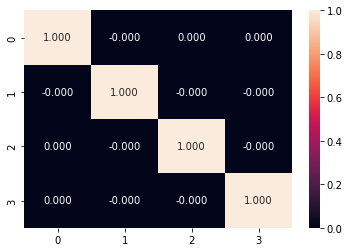

In [34]:
sns.heatmap(pd.DataFrame(data_reduced).corr(), annot = True, fmt = '0.3f')

In [35]:
df_comp = pd.DataFrame(pca.components_.T,index=list(data_scaled), columns = ['PC1', 'PC2', 'PC3', 'PC4'])
df_comp

,PC1,PC2,PC3,PC4
ProdQual,-0.133790,-0.313498,0.062272,0.643136
Ecom,-0.165953,0.446509,-0.235248,0.272380
TechSup,-0.157693,-0.230967,-0.610951,-0.193393
CompRes,-0.470684,0.019444,0.210351,-0.206320
Advertising,-0.183735,0.363665,-0.088097,0.317894
ProdLine,-0.386765,-0.284781,0.116279,0.202902
SalesFImage,-0.203670,0.470696,-0.241342,0.222177
ComPricing,0.151689,0.413457,0.053045,-0.333543
WartyClaim,-0.212934,-0.191672,-0.598564,-0.185302
OrdBilling,-0.437218,0.026399,0.168930,-0.236854


In [36]:
for i in df_comp.columns:
    pc_score = np.dot(df_comp[i], data_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

0.079551 1.543198 1.895046 1.168119 

In [37]:
df_comp.iloc[:,0]

ProdQual      -0.133790
Ecom          -0.165953
TechSup       -0.157693
CompRes       -0.470684
Advertising   -0.183735
ProdLine      -0.386765
SalesFImage   -0.203670
ComPricing     0.151689
WartyClaim    -0.212934
OrdBilling    -0.437218
DelSpeed      -0.473089
Name: PC1, dtype: float64

In [38]:
len(df_comp.iloc[:,0])

11

In [39]:
for i in range(len(df_comp.iloc[:,0])):
    for j in range(len(df_comp.index)):
        if i == j:
            print(df_comp.iloc[i,0].round(3),'x',df_comp.index[j])

-0.134 x ProdQual
-0.166 x Ecom
-0.158 x TechSup
-0.471 x CompRes
-0.184 x Advertising
-0.387 x ProdLine
-0.204 x SalesFImage
0.152 x ComPricing
-0.213 x WartyClaim
-0.437 x OrdBilling
-0.473 x DelSpeed


In [41]:
for i in range(len(df_comp.iloc[:,1])):
    for j in range(len(df_comp.index)):
        if i == j:
            print(df_comp.iloc[i,1].round(3),'x',df_comp.index[j])

-0.313 x ProdQual
0.447 x Ecom
-0.231 x TechSup
0.019 x CompRes
0.364 x Advertising
-0.285 x ProdLine
0.471 x SalesFImage
0.413 x ComPricing
-0.192 x WartyClaim
0.026 x OrdBilling
0.073 x DelSpeed


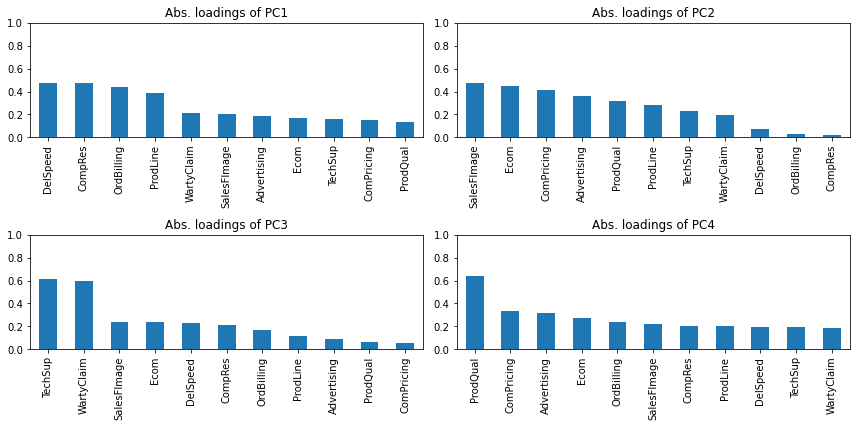

In [40]:
df_selected = df_comp
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

# END